                                        AI ML DS

In [3]:
import pandas as pd
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.describe()
#df.describe().transpose()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

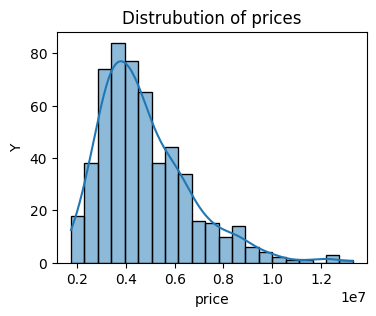

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (4,3))
sns.histplot(df['price'], kde= True)
plt.title("Distrubution of prices")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

In [21]:
#selecting relevant columns for price prediction
data = df[['price', 'area', 'bedrooms', 'bathrooms', 'parking']]

In [22]:
data.head()

,price,area,bedrooms,bathrooms,parking
0,13300000,7420,4,2,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,1,2


In [23]:
X = data[['area', 'bedrooms', 'bathrooms', 'parking']]
Y = data['price']

In [24]:
X.shape

(545, 4)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
Y_pred = model.predict(X_test)
Y_pred

array([6388728.68706833, 5908809.3451346 , 3454596.99923808,
       4091337.84353348, 3771974.18198997, 4619516.20685545,
       5816708.98558798, 5787061.49326415, 3531156.63415821,
       3385052.82281224, 8890779.10229743, 3422046.47219615,
       3356331.25722469, 3507885.00032898, 3775044.98642789,
       6384339.30736536, 2828152.89390272, 4720642.27727893,
       4674580.21071016, 4056474.66907009, 4097479.45240932,
       4651759.6534536 , 3334528.54571547, 4045065.30093688,
       6056021.25571779, 7615755.66056159, 3162870.57763583,
       4834027.79186315, 7253845.46253381, 3135233.33769456,
       5141108.23565499, 3836250.59915842, 5755269.12323868,
       4587272.76025731, 4364188.36193555, 5647580.4918837 ,
       4627079.34633838, 3874395.05408756, 3624575.56896988,
       5110563.27559072, 5650885.54594039, 3328694.01728343,
       5884242.90963125, 4167897.47845361, 4286785.00191398,
       4343384.40798764, 5755269.12323868, 4644956.49197726,
       4685989.57884337,

In [37]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}, r2_score: {r2}")

Mean Squared Error: 2608333790562.276, r2_score: 0.48396527035294845


# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop a specific column (if it's not important for the model)
df_cleaned = df.drop(columns=['ColumnName'])  # Replace 'ColumnName' with the actual column name


# Impute missing numerical data with the mean or median
df['LotArea'].fillna(df['LotArea'].mean() or median(), inplace=True)

# Impute missing categorical data with 'Unknown'
df['GarageType'].fillna('Unknown', inplace=True)


                                    Supervised Learning

Classification - predicts categorical label
goal is to classify data points into one of two or more classes
for eg - to predict whether a mail is spam or not

classification algorithms

Logistic Regression - used for binary classification. It models probability of an event occuring by fitting to a logistic curve.
Decision Trees - Tree like model where nodes represents decision or condition and branches lead to outcomes(classificication)
Random forests - builds multiple decision trees and averages their results. reduces overfitting and improves model accuracy


In [42]:
df = pd.read_csv("archive 2/The Titanic dataset.csv")
df.head()

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


In [40]:
df.isnull().sum()

1       0
2       0
3       0
4       1
5       1
6     257
7       2
8       2
9       6
10      0
dtype: int64

In [44]:
df = pd.read_csv("archive 2/The Titanic dataset.csv", header=1)
df.head()

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2.0,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.25,S,04-Jan-90


In [46]:
df = pd.read_csv("archive 2/Titanic Dataset.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [53]:
df['age'].fillna(df['age'].median(),inplace= True)
df['fare'].fillna(df['fare'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode().iloc[0],inplace=True)
#other columns has so many missing values, not effective for classification so will drop those columns

In [54]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [55]:
df.drop(columns=['cabin','boat','body','home.dest'],inplace=True)

In [56]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S


In [59]:
df_encoded = pd.get_dummies(df, columns= ['sex','embarked'],drop_first=True)

In [60]:
df_encoded.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,sex_male,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,1,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,1,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,0,0,1


In [76]:
#feature selection
X = df_encoded[['pclass','age','sibsp','parch','fare','sex_male','embarked_S']]
y = df_encoded['survived']

In [77]:
#split data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
df_encoded.describe()
print(X.shape)  # Should return (545, n_features)
print(y.shape)  # Should return (545,) or (545, 1)


(1309, 7)
(1309,)


In [79]:
df_encoded.isnull()

,pclass,survived,name,age,sibsp,parch,ticket,fare,sex_male,embarked_Q,embarked_S
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df_encoded['survived']

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [81]:
X_train.shape, X_test.shape

((1047, 7), (262, 7))

In [82]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
y_pred = log_model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")

Accuracy:0.7824427480916031
Precision:0.8351648351648352


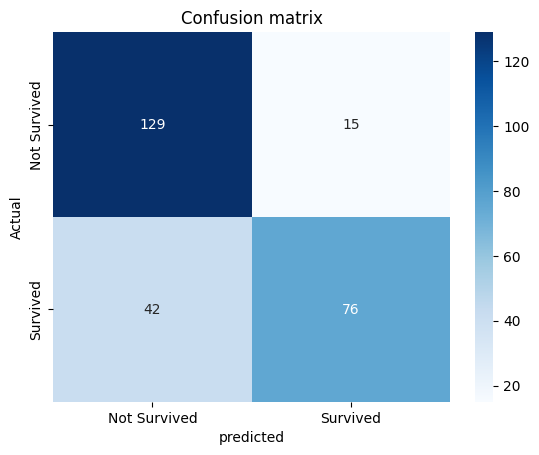

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt ='d', cmap='Blues',xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()


In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
dtc_pred = dtc_model.predict(X_test)

In [87]:
acc = accuracy_score(y_test, dtc_pred)
print(f"accuarcy:{acc}")

accuarcy:0.7824427480916031


K-Nearest Neighbours 
non-parametric classification algorithm that classifies a datapoint based on how its nearest neighbours classified
find k closest points to the datapoint you are classifying, then predict the majority class among those neighbours
generally 3 to 5 neighbours
uses euclidean distance

Support Vector Machine
powerful classification algorithm that finds optimal hyperplane which maximizes the distance between different classes in the dataset
can be used for both linear and non-linear classification problems by using different kernels
kernel function used to transform the data
linear - for linearly separable data
rbf- radial basis function for non-linear

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [90]:
k_pred = knn_model.predict(X_test)

In [91]:
knn_accuracy = accuracy_score(y_test,k_pred)
print(f"accuracy:{knn_accuracy}")

accuracy:0.6870229007633588


In [98]:
knn_model1 = KNeighborsClassifier(n_neighbors = 3)
knn_model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
k_pred1 = knn_model1.predict(X_test)
knn_accuracy1 = accuracy_score(y_test,k_pred1)
print(f"accuracy:{knn_accuracy1}")

accuracy:0.6603053435114504


In [101]:
from sklearn.svm import SVC
svm_model = SVC(kernel="rbf", C=1)
svm_model.fit(X_train,y_train)

SVC(C=1)

In [102]:
svm_pred = svm_model.predict(X_test)

In [104]:
svm_acc = accuracy_score(y_test, svm_pred)
print(f"svm_accuracy:{svm_acc}")

svm_accuracy:0.6183206106870229


Cross Validation - technique for assessing the generalization of your model
Instead of splitting the dataset into single train and test set, K-fold cross validation divides the dataset into K folds(subsets).
model is trained on k1-folds and tested on remaining folds
process repeats k times and results are averaged


Confusion matrix
2x2 binary classification
true positive - correctly predicted positives
true negative - correctly predicted negatives
false positive - Incorrectly predicted positives
false negative - Incorrectly predicted negatives


ROC curve - plots recall against specificity
AUC is used as a performance metric, where 1 is perfect classification, 0.5 is random guessing

In [105]:
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression()
cv_scores = cross_val_score(log_model, X, y,cv=5, scoring='accuracy')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [106]:
print("Cross-validation scores:\n",cv_scores)

Cross-validation scores:
 [0.53816794 0.83969466 0.81679389 0.72900763 0.66666667]


In [107]:
print("Average CV score:\n", cv_scores.mean())

Average CV score:
 0.7180661577608143


Unsupervised Learning

Clustering - to group data points into clusters based on their similarities
Each cluster contains data points that are similar to each other than to points in other cluster.

K-Means Algorithm - It tries to divide the data into K clusters where each data point belongs to the cluster with the nearest centroid.

Steps of K-means algorithm

1) Choose K
2) Randomly initialize k centroids
3) assign each point to the nearest centroid
4) update the centroids by calculating the mean of data points assigned to each cluster
5) repeat 3 and 4 untill centroids no longer move

Inertia - sum of squared distances of samples to their closest clusster center. lower inertia indicates better clustering
silhouette score - measures how similar is the data point to its own ccluster than the other cluster. higher scores(close to 1 )indicates better clustering

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#selecting features for clustering
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [14]:
X.shape

(200, 2)

In [6]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

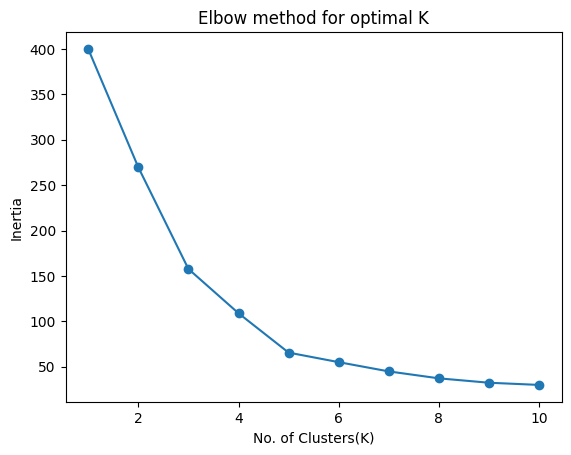

In [17]:
#apply K means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia =[]
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
#print("Length of K_range:", len(K_range))
#print("Length of inertia:", len(inertia))
plt.plot(K_range,inertia,marker='o')
plt.title("Elbow method for optimal K")
plt.xlabel("No. of Clusters(K)")
plt.ylabel("Inertia")
plt.show()
    

In [18]:
kmeans= KMeans(n_clusters = 5, random_state= 42)
#predict the cluster
clusters= kmeans.fit_predict(X_scaled)
#adding to the originl df
df['cluster']=clusters

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


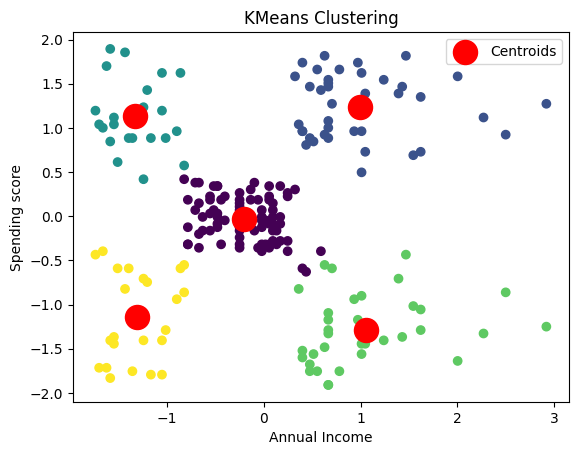

In [20]:
#Visualize the clusters
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [21]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 65.56840815571681


In [22]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled,clusters)
print(f"silhouette_score:{sil_score}")

silhouette_score:0.5546571631111091


In [36]:
#trying with different number of clusters to find optimal K
kmeans= KMeans(n_clusters = 6, random_state= 42)
#predict the cluster
clusters= kmeans.fit_predict(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


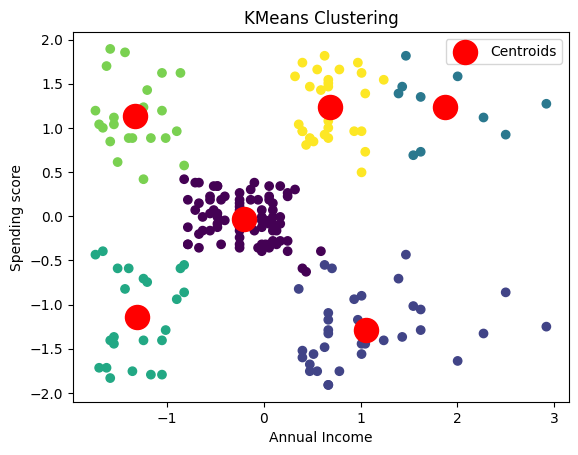

In [37]:
#Visualize the clusters
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [38]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 55.057348270385994


In [39]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled,clusters)
print(f"silhouette_score:{sil_score}")

silhouette_score:0.5398800926790663
